# Webscarping Goodreads

This file is used to webscrape the required book data from the goodread.com List of "Books that everyone should have read at least once", using beautiful soup.
The list contains 24,529 books.

## Import Libraries

In [915]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import math
import re
import time
import random

## Request URL

In [262]:
books = requests.get("https://www.goodreads.com/list/show/264.Books_That_Everyone_Should_Read_At_Least_Once?page={pagenr}")
print("books:", books.status_code)

books: 200


## Fetch book information

In [ ]:
# book title - Done

#book series - Done 

#book genres - Done

#book author - Done

#book desription -Done

#book year published - Done

#number of pages - Done 

#language - Done 

#isbn10 - Done

#av rating - Done 

#1 star ratings, 2 star ratings .. - will not do 

#number of total ratings - Done

#book cover link - Done 

In [916]:
books = requests.get("https://www.goodreads.com/book/show/3450744-nudge")
print("books:", books.status_code)
soup = BeautifulSoup(books.content, 'html.parser')

books: 200


In [575]:
print(soup.prettify)

<bound method Tag.prettify of <!DOCTYPE html>

<html class="desktop">
<head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# good_reads: http://ogp.me/ns/fb/good_reads#">
<title>The First Days (As the World Dies, #1) by Rhiannon Frater</title>
<meta content="The First Days book. Read 1,141 reviews from the world's largest community for readers. Katie is driving to work one beautiful day when a dead man jumps ..." name="description"/>
<meta content="telephone=no" name="format-detection"/>
<link href="https://www.goodreads.com/book/show/9648068-the-first-days" rel="canonical"/>
<meta content="2415071772" property="fb:app_id"/>
<meta content="books.book" property="og:type"/>
<meta content="The First Days (As the World Dies, #1)" property="og:title"/>
<meta content="Katie is driving to work one beautiful day when a dead man jumps into her car and tries to eat her.  That same morning, Jenni opens a bed..." property="og:description"/>
<meta content="https://i.gr-assets.com/images/S/com

### Book Title

In [917]:
def get_book_title(soup):
    if soup.find(id='bookTitle'):
        btitle = soup.find(id="bookTitle").get_text(strip=True)
        return btitle
    return ''

In [918]:
get_book_title(soup)

'Nudge: Improving Decisions About Health, Wealth, and Happiness'

### Book isbn10 

In [919]:
# This function gives back the isbn10 number by browsing the soup as string for "nisbn". 
#The first "nisbn" in the html code is the ISBN number of the chosen book[0].
def get_book_isbn10(soup):
    try:
        isbn10 = re.findall(r'nisbn: \d{10}' , str(soup))[0] #get first nisbn number in str(soup)
        return isbn10.split()[1] # only show isbn number not "nisbn"
    except:
        return "isbn not found"


In [920]:
get_book_isbn10(soup)

'0300122233'

### Book Series

In [921]:
def get_book_series(soup):
    if soup.find(id="bookSeries").find('a'):
        book_series=soup.find(id="bookSeries").find('a').get_text(strip=True)
        book_series=book_series.replace('(',')')
        return (book_series.split(')')[1]) 
    return ''

#not a really generic solution, but works ;) Alternative would have been re.search (...)


In [922]:
get_book_series(soup)

''

### Book Description

In [923]:
def get_book_description(soup):
    bdescription= ''
    if soup.find(id="description").find(style="display:none"):
        bdescription +=soup.find(id="description").find(style="display:none").get_text(strip=True)
        return bdescription
    return ''

In [924]:
get_book_description(soup)

'From the winner of the 2017 Nobel Prize in Economics, Richard H. Thaler, and Cass R. Sunstein: a revelatory look at how we make decisionsNew York Times bestsellerNamed a Best Book of the Year byThe Economistand theFinancial TimesEvery day we make choices—about what to buy or eat, about financial investments or our children’s health and education, even about the causes we champion or the planet itself. Unfortunately, we often choose poorly. Nudge is about how we make these choices and how we can make better ones. Using dozens of eye-opening examples and drawing on decades of behavioral science research, Nobel Prize winner Richard H. Thaler and Harvard Law School professor Cass R. Sunstein show that no choice is ever presented to us in a neutral way, and that we are all susceptible to biases that can lead us to make bad decisions. But by knowing how people think, we can use sensible “choice architecture” to nudge people toward the best decisions for ourselves, our families, and our soci

### Book Author

In [925]:
#DONE - This function gives a list with all the authors
def get_book_authors(soup):
    if soup.find(id="bookAuthors").find_all(itemprop='name'):  #find('a', attrs={'class': 'authorName'}).find(itemprop='name'):
        authors=soup.find(id="bookAuthors").find_all(itemprop='name')#.find(itemprop='name')
        #print(authors)
        authors_all=[]
        for i in authors:
            authors_all.append(i.get_text(strip=True))
        return(authors_all)
    return ''

In [926]:
get_book_authors(soup)

['Richard H. Thaler', 'Cass R. Sunstein']

### Number of pages

In [927]:
def get_book_pages(soup):
    if soup.find(id="details").find(itemprop='numberOfPages'):  #find('a', attrs={'class': 'authorName'}).find(itemprop='name'):
        pages=soup.find(id="details").find(itemprop='numberOfPages').get_text(strip=True)#.find(itemprop='name')
        return int(pages.split()[0])
    return ''

In [928]:
get_book_pages(soup)

260

### Date first published

In [929]:
def get_book_year(soup):
    if soup.find('nobr', attrs={'class':'greyText'}):
        year_published=soup.find('nobr', attrs={'class':'greyText'}).get_text(strip=True)
        #print(year_published)
        return re.search('(\d{4})', year_published).group(1) #search for year: number with 4 digits
    return ''

In [930]:
get_book_year(soup)

'2008'

### Language

In [931]:
def get_book_language(soup):
    if soup.find(itemprop="inLanguage"):
        language=soup.find(itemprop="inLanguage").get_text(strip=True)
        return language
    return ''

In [932]:
get_book_language(soup)

'English'

### Book Cover Link

In [933]:
def get_book_cover(soup):
    if soup.find(id="coverImage"):
        cover=soup.find(id="coverImage")
       # print(cover)
        return cover.get('src') #img.get
    return''

In [934]:
get_book_cover(soup)

'https://i.gr-assets.com/images/S/compressed.photo.goodreads.com/books/1348322381l/3450744.jpg'

### Number of total ratings

In [935]:
def get_total_ratings(soup):
    if soup.find(itemprop='ratingCount'):  #find('a', attrs={'class': 'authorName'}).find(itemprop='name'):
        reviews=soup.find(itemprop='ratingCount').get_text(strip=True)#.find(itemprop='name')
        return reviews.split()[0]#float(pages.split()[0])

In [936]:
get_total_ratings(soup)

'74,260'

### Average rating of book

In [937]:
def get_bookavrating(soup):
    if soup.find("span", itemprop="ratingValue"):#soup.find("div", class_="RatingStatistics__rating"):
        av_rating = soup.find("span", itemprop="ratingValue").get_text(strip=True)#soup.find("div", class_="RatingStatistics__rating")
        return float(av_rating)
    return ''

In [938]:
get_bookavrating(soup)

3.82

### Number of different star ratings - skip due to time reasons

### Book Genres

In [939]:
#This function gets all genres listed under more, can be various amounts
def get_all_book_genres(soup):
    genres=[]
    for i in soup.find_all('div', class_="left"):
        genre=i.find_all('a', class_="actionLinkLite bookPageGenreLink")
        for j in genre:
            texts=j.get_text(strip=True)
            if texts not in genres:
                genres.append(texts)
    return genres
    

In [940]:
get_all_book_genres(soup)

['Nonfiction',
 'Psychology',
 'Economics',
 'Business',
 'Self Help',
 'Science',
 'Politics',
 'Personal Development',
 'Sociology',
 'Social Science']

In [818]:
#This function pulls all available genres. Not correct. 
def gs(soup):
    if soup.find('div', class_='siteHeader').find('div', attrs={'data-react-class':'ReactComponents.HeaderStoreConnector'}).find_all('li',class_='genreList__genre'):
        #div data-react-class="ReactComponents.HeaderStoreConnector"
        gs=soup.find('div', class_='siteHeader').find('div', attrs={'data-react-class':'ReactComponents.HeaderStoreConnector'}).find_all('li',class_='genreList__genre')
        #print(gs)
        gslist=[]
        for t in gs:
            gslist.append(t.get_text(strip=True))
        return gslist
    return ''

In [819]:
gs(soup)

[<li class="genreList__genre" data-reactid=".1bnbnfbifre.1.0.2.0.2.0.1.0.1.0.1:$genreList0.0:$Art" role="menuitem"><a class="genreList__genreLink gr-hyperlink gr-hyperlink--naked" data-reactid=".1bnbnfbifre.1.0.2.0.2.0.1.0.1.0.1:$genreList0.0:$Art.0" href="/genres/art">Art</a></li>, <li class="genreList__genre" data-reactid=".1bnbnfbifre.1.0.2.0.2.0.1.0.1.0.1:$genreList0.0:$Biography" role="menuitem"><a class="genreList__genreLink gr-hyperlink gr-hyperlink--naked" data-reactid=".1bnbnfbifre.1.0.2.0.2.0.1.0.1.0.1:$genreList0.0:$Biography.0" href="/genres/biography">Biography</a></li>, <li class="genreList__genre" data-reactid=".1bnbnfbifre.1.0.2.0.2.0.1.0.1.0.1:$genreList0.0:$Business" role="menuitem"><a class="genreList__genreLink gr-hyperlink gr-hyperlink--naked" data-reactid=".1bnbnfbifre.1.0.2.0.2.0.1.0.1.0.1:$genreList0.0:$Business.0" href="/genres/business">Business</a></li>, <li class="genreList__genre" data-reactid=".1bnbnfbifre.1.0.2.0.2.0.1.0.1.0.1:$genreList0.0:$Children's" r

['Art',
 'Biography',
 'Business',
 "Children's",
 'Christian',
 'Classics',
 'Comics',
 'Cookbooks',
 'Ebooks',
 'Fantasy',
 'Fiction',
 'Graphic Novels',
 'Historical Fiction',
 'History',
 'Horror',
 'Memoir',
 'Music',
 'Mystery',
 'Nonfiction',
 'Poetry',
 'Psychology',
 'Romance',
 'Science',
 'Science Fiction',
 'Self Help',
 'Sports',
 'Thriller',
 'Travel',
 'Young Adult',
 'More Genres',
 'Art',
 'Biography',
 'Business',
 "Children's",
 'Christian',
 'Classics',
 'Comics',
 'Cookbooks',
 'Ebooks',
 'Fantasy',
 'Fiction',
 'Graphic Novels',
 'Historical Fiction',
 'History',
 'Horror',
 'Memoir',
 'Music',
 'Mystery',
 'Nonfiction',
 'Poetry',
 'Psychology',
 'Romance',
 'Science',
 'Science Fiction',
 'Self Help',
 'Sports',
 'Thriller',
 'Travel',
 'Young Adult',
 'More Genres']

gs1(soup)

In [541]:
print(soup.prettify)

<bound method Tag.prettify of <!DOCTYPE html>

<html class="desktop">
<head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# good_reads: http://ogp.me/ns/fb/good_reads#">
<title>The First Days (As the World Dies, #1) by Rhiannon Frater</title>
<meta content="The First Days book. Read 1,141 reviews from the world's largest community for readers. Katie is driving to work one beautiful day when a dead man jumps ..." name="description"/>
<meta content="telephone=no" name="format-detection"/>
<link href="https://www.goodreads.com/book/show/9648068-the-first-days" rel="canonical"/>
<meta content="2415071772" property="fb:app_id"/>
<meta content="books.book" property="og:type"/>
<meta content="The First Days (As the World Dies, #1)" property="og:title"/>
<meta content="Katie is driving to work one beautiful day when a dead man jumps into her car and tries to eat her.  That same morning, Jenni opens a bed..." property="og:description"/>
<meta content="https://i.gr-assets.com/images/S/com

## Scrape Data

### From one book page

In [941]:
#Done - trying to scrape from one book
title=[]
series=[]
authors=[]
isbn=[]
genres=[]
descriptions=[]
years=[]
pages=[]
languages=[]
setting=[]
av_ratings=[]
total_ratings=[]
cover_image_link=[]



title.append(get_book_title(soup))
series.append(get_book_series(soup))
authors.append(get_book_authors(soup))
isbn.append(get_book_isbn10(soup))
genres.append(get_all_book_genres(soup))
descriptions.append(get_book_description(soup))
pages.append(get_book_isbn10(soup))
years.append(get_book_year(soup))
languages.append(get_book_language(soup))
cover_image_link.append(get_book_cover(soup))
total_ratings.append(get_total_ratings(soup))
av_ratings.append(get_bookavrating(soup))





print((title,series, authors,isbn,descriptions,pages,genres,years,languages,cover_image_link, total_ratings,av_ratings)) 


(['Nudge: Improving Decisions About Health, Wealth, and Happiness'], [''], [['Richard H. Thaler', 'Cass R. Sunstein']], ['0300122233'], ['From the winner of the 2017 Nobel Prize in Economics, Richard H. Thaler, and Cass R. Sunstein: a revelatory look at how we make decisionsNew York Times bestsellerNamed a Best Book of the Year byThe Economistand theFinancial TimesEvery day we make choices—about what to buy or eat, about financial investments or our children’s health and education, even about the causes we champion or the planet itself. Unfortunately, we often choose poorly. Nudge is about how we make these choices and how we can make better ones. Using dozens of eye-opening examples and drawing on decades of behavioral science research, Nobel Prize winner Richard H. Thaler and Harvard Law School professor Cass R. Sunstein show that no choice is ever presented to us in a neutral way, and that we are all susceptible to biases that can lead us to make bad decisions. But by knowing how pe

### Extract all book URLs from List

In [895]:
#Extract all urls of books
def geturls(startpage,endpage):
    urls_all=[]
    for pagenr in range(startpage,endpage):    
        req = requests.get('https://www.goodreads.com/list/show/264.Books_That_Everyone_Should_Read_At_Least_Once?page={pagenr}')
        soup = BeautifulSoup(req.content, 'html.parser')
        #print(soup)
        urls=soup.find_all('a', class_='bookTitle')#.get('href')
        for i in urls:
            urls_all.append('https://www.goodreads.com'+i.get('href'))
        time.sleep(random.randint(1,4))
    print(urls_all)
    df = pd.DataFrame({"url": urls_all})
    df.to_csv(r'c:\Users\anton\Desktop\df_urls{pagenr}.csv',index=None, header=True)
    

In [896]:
geturls(1,2)

['https://www.goodreads.com/book/show/2657.To_Kill_a_Mockingbird', 'https://www.goodreads.com/book/show/3.Harry_Potter_and_the_Sorcerer_s_Stone', 'https://www.goodreads.com/book/show/1885.Pride_and_Prejudice', 'https://www.goodreads.com/book/show/48855.The_Diary_of_a_Young_Girl', 'https://www.goodreads.com/book/show/170448.Animal_Farm', 'https://www.goodreads.com/book/show/40961427-1984', 'https://www.goodreads.com/book/show/157993.The_Little_Prince', 'https://www.goodreads.com/book/show/4671.The_Great_Gatsby', 'https://www.goodreads.com/book/show/5107.The_Catcher_in_the_Rye', 'https://www.goodreads.com/book/show/33.The_Lord_of_the_Rings', 'https://www.goodreads.com/book/show/19063.The_Book_Thief', 'https://www.goodreads.com/book/show/10210.Jane_Eyre', 'https://www.goodreads.com/book/show/11127.The_Chronicles_of_Narnia', 'https://www.goodreads.com/book/show/7624.Lord_of_the_Flies', 'https://www.goodreads.com/book/show/18135.Romeo_and_Juliet', 'https://www.goodreads.com/book/show/136251

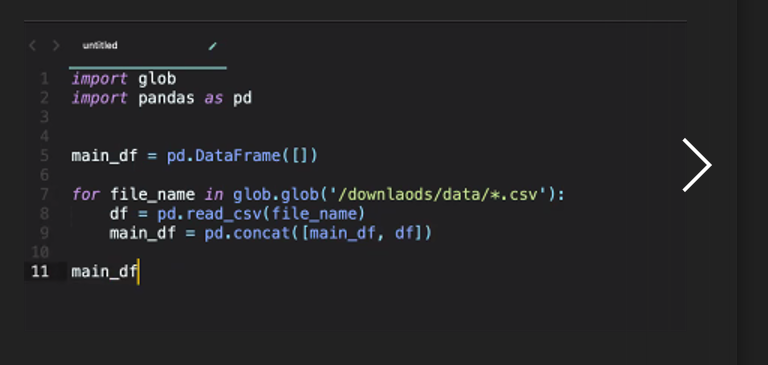 Concat many df

In [908]:
link_list=pd.read_csv('df_urls{pagenr}.csv')
link_list= link_list['url'].tolist()

['https://www.goodreads.com/book/show/2657.To_Kill_a_Mockingbird',
 'https://www.goodreads.com/book/show/3.Harry_Potter_and_the_Sorcerer_s_Stone',
 'https://www.goodreads.com/book/show/1885.Pride_and_Prejudice',
 'https://www.goodreads.com/book/show/48855.The_Diary_of_a_Young_Girl',
 'https://www.goodreads.com/book/show/170448.Animal_Farm',
 'https://www.goodreads.com/book/show/40961427-1984',
 'https://www.goodreads.com/book/show/157993.The_Little_Prince',
 'https://www.goodreads.com/book/show/4671.The_Great_Gatsby',
 'https://www.goodreads.com/book/show/5107.The_Catcher_in_the_Rye',
 'https://www.goodreads.com/book/show/33.The_Lord_of_the_Rings',
 'https://www.goodreads.com/book/show/19063.The_Book_Thief',
 'https://www.goodreads.com/book/show/10210.Jane_Eyre',
 'https://www.goodreads.com/book/show/11127.The_Chronicles_of_Narnia',
 'https://www.goodreads.com/book/show/7624.Lord_of_the_Flies',
 'https://www.goodreads.com/book/show/18135.Romeo_and_Juliet',
 'https://www.goodreads.com/b

## Scrape all book sites

In [ ]:
#scrape all links on link list

In [955]:
def getfinaldata(url_list):
    title=[]
    series=[]
    authors=[]
    isbn=[]
    genres=[]
    descriptions=[]
    years=[]
    pages=[]
    languages=[]
    setting=[]
    av_ratings=[]
    total_ratings=[]
    cover_image_link=[]
    #Load link liste: link_list=df.to_list()
    link_list=pd.read_csv(url_list)
    link_list=link_list['url'].tolist()
    
    for url in link_list:
        req = requests.get(url)
        soup = BeautifulSoup(req.content, 'html.parser')
        #FETCH DATA, append lists:
        title.append(get_book_title(soup))
        
        try:
            series.append(get_book_series(soup))
        except:
            series.append('None')
        try:  
            authors.append(get_book_authors(soup))
        except:
            authors.append('None')
            
        isbn.append(get_book_isbn10(soup))
        genres.append(get_all_book_genres(soup))
        try:
            descriptions.append(get_book_description(soup))
        except:
            descriptions.append('None')
        try:    
            pages.append(get_book_pages(soup))
        except:
            pages.append('None')
        try:
            years.append(get_book_year(soup))
        except:
            years.append('None')
            
        languages.append(get_book_language(soup))
        cover_image_link.append(get_book_cover(soup))
        total_ratings.append(get_total_ratings(soup))
        av_ratings.append(get_bookavrating(soup))
        print(url)
        time.sleep(random.randint(1,4))
    #CREATE DATAFRAME FROM LISTS
    df = pd.DataFrame(
    {
     "title": title, 
     "series": series,
     "authors": authors,
     "isbn": isbn,
     "genres": genres,
     "description": descriptions,
     "pages": pages,
     "year": years, 
     "language": languages, 
     "cover_image": cover_image_link,
     "total_number_ratings": total_ratings, 
     "average_rating": av_ratings,
     }
    )
    df
    df.to_csv(r'c:\Users\anton\Desktop\df_alldetails.csv',index=None, header=True)
    return df    

In [956]:
getfinaldata('df_urls{pagenr}2.csv')

https://www.goodreads.com/book/show/2657.To_Kill_a_Mockingbird
https://www.goodreads.com/book/show/3.Harry_Potter_and_the_Sorcerer_s_Stone
https://www.goodreads.com/book/show/1885.Pride_and_Prejudice


,title,series,authors,isbn,genres,description,pages,year,language,cover_image,total_number_ratings,average_rating
0,To Kill a Mockingbird,To Kill a Mockingbird,[Harper Lee],1439550417,"[Classics, Fiction, Historical, Historical Fic...",The unforgettable novel of a childhood in a sl...,324,1960,English,https://i.gr-assets.com/images/S/compressed.ph...,"5,004,764",4.27
1,Harry Potter and the Sorcerer's Stone,Harry Potter #1,[J.K. Rowling],isbn not found,"[Fantasy, Fiction, Young Adult, Magic, Childre...",Harry Potter's life is miserable. His parents ...,309,1997,English,https://i.gr-assets.com/images/S/compressed.ph...,"7,989,460",4.47
2,Pride and Prejudice,,"[Jane Austen, Anna Quindlen]",0553213105,"[Classics, Fiction, Romance, Historical, Histo...",Alternate cover edition of ISBN 9780679783268S...,279,1813,English,https://i.gr-assets.com/images/S/compressed.ph...,"3,390,660",4.27
